<div style="background-color: white; color: black; font-family: 'Times New Roman', serif; padding: 50px; max-width: 450px; margin: auto; border: 1px solid #ccc; box-shadow: 0 0 10px rgba(0,0,0,0.1);">
  <div align="center">
    <img src="Imagenes/ugr_escudo_sin.png" alt="Escudo UGR" style="height: 120px;"><br><br>
    <h2 style="margin-bottom: 0;">Universidad de Granada</h2>
    <h3 style="margin-top: 0;">TRABAJO FIN DE GRADO</h3>
    <p style="font-variant: small-caps; font-size: 14px;">
      Doble Grado en Ingeniería Informática y Administración y Dirección de Empresas
    </p>
    <hr style="width: 60%; border: 1px solid black;">
    <h2 style="font-size: 20px;">
      Análisis y Optimización de<br>
      Rutas Aéreas Comerciales<br>
      mediante Ciencia de Datos
    </h2>
    <hr style="width: 60%; border: 1px solid black;">
    <br>
    <p><strong>Autor</strong><br>José Antonio Fernández Aranda</p>
    <p><strong>Director</strong><br>Jorge Casillas Barranquero</p>
    <p><strong><br>Análisis Medioambiental</strong></p>
    <br><br>
    <div style="display: flex; justify-content: center; align-items: center; gap: 80px; flex-wrap: wrap;">
      <img src="https://etsiit.ugr.es/sites/centros/etsiit/public/template-extra/etsiit-logo.png" alt="Logo ETSIIT" style="height: 100px;">
      <img src="Imagenes/logo_decsai.png" alt="Logo DECSAI" style="height: 100px;">
    </div>
    <br>
    <p style="font-size: 14px;">
      Escuela Técnica Superior de Ingenierías Informática y de Telecomunicación<br>
      —<br>
      Granada, a 8 de junio de 2025
    </p>
  </div>
</div>

## Análisis Medioambiental: Estimación de emisiones de CO2

### Bibliotecas, carga y unificación de datos

In [1]:
import pandas as pd
import numpy as np

# Cargar los datasets
df1 = pd.read_excel("Vuelos_datos/3_vuelos_con_duracion_CALCULADO.xlsx")
df2 = pd.read_excel("Vuelos_datos/vuelos_con_duracion_CALCULADO.xlsx")

# Unir datasets y normalizar columnas
df_base = pd.concat([df1, df2], ignore_index=True)
df_base.columns = df_base.columns.str.strip().str.lower().str.replace(" ", "_")
df_base["tipo"] = df_base["tipo"].astype(str).str.strip().str.upper()

### Tasa estimación de emisión de kg CO2 / hora

In [2]:
tabla_emisiones = pd.DataFrame({
    "tipo": ["A320", "B738", "B737", "A319", "ATR72", "CRJ900", "E190"],
    "emisiones_kg_hora": [2500, 2600, 2550, 2400, 1000, 1400, 1600]
})
tabla_emisiones["tipo"] = tabla_emisiones["tipo"].str.strip().str.upper()

### Unión de los datos y calculo de las emisiones estimadas

In [3]:
df_emisiones = df_base.merge(tabla_emisiones, on="tipo", how="left")

# Calcular duración en horas y emisiones estimadas
df_emisiones["duracion_horas"] = pd.to_numeric(df_emisiones["duración_(min)"], errors='coerce') / 60
df_emisiones["co2_estimado_kg"] = df_emisiones["emisiones_kg_hora"] * df_emisiones["duracion_horas"]

### Filtrado y muestra de resultados

In [4]:
df_emisiones_validos = df_emisiones.dropna(subset=["co2_estimado_kg"])

# Mostrar primeros vuelos con estimación de CO₂
df_emisiones_validos[[
    "ident", "tipo", "origen", "destino", "duración_(min)", "duracion_horas", "co2_estimado_kg"
]].head()


,ident,tipo,origen,destino,duración_(min),duracion_horas,co2_estimado_kg
3,DAL1012,A320,Int'l de Detroit (KDTW),Int'l de Austin-Bergstrom (KAUS),160.0,2.666667,6666.666667
7,DAL1041,A320,Int'l de Dallas-Fort Worth (KDFW),Int'l de Detroit (KDTW),116.0,1.933333,4833.333333
13,DAL1071,A320,Int'l de Detroit (KDTW),Int'l de Dallas-Fort Worth (KDFW),137.0,2.283333,5708.333333
21,DAL1359,B738,Northwest Florida Beaches Intl (KECP),Int'l Hartsfield-Jackson (KATL),42.0,0.700000,1820.000000
28,DAL1406,B738,Int'l de Austin-Bergstrom (KAUS),Int'l John F. Kennedy (KJFK),183.0,3.050000,7930.000000


## Análisis de los datos 

### 1. Análisis medioambiental por zonas horarias

In [5]:
# Asegurar columnas en mayúsculas y limpias
df_emisiones_validos["zona_salida"] = df_emisiones_validos["zona_horaria_salida"].astype(str).str.upper().str.strip()
df_emisiones_validos["zona_llegada"] = df_emisiones_validos["zona_horaria_llegada"].astype(str).str.upper().str.strip()

# Agrupar por zona horaria de salida
zona_salida_emisiones = df_emisiones_validos.groupby("zona_salida").agg(
    vuelos=("ident", "count"),
    media_emisiones=("co2_estimado_kg", "mean"),
    total_emisiones=("co2_estimado_kg", "sum")
).sort_values(by="total_emisiones", ascending=False).round(2)


C:\Users\janto\AppData\Local\Temp\ipykernel_3540\4187801882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["zona_salida"] = df_emisiones_validos["zona_horaria_salida"].astype(str).str.upper().str.strip()
C:\Users\janto\AppData\Local\Temp\ipykernel_3540\4187801882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["zona_llegada"] = df_emisiones_validos["zona_horaria_llegada"].astype(str).str.upper().str.strip()


### Visualización de zonas horarias

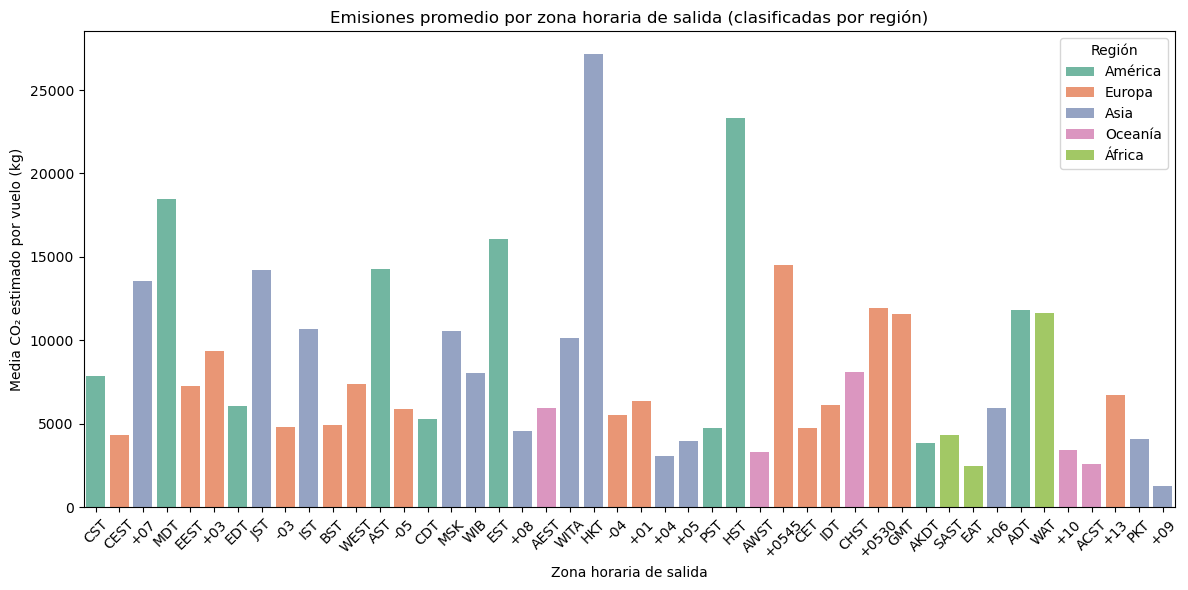

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clasificación de regiones según zona horaria
def clasificar_region(zona):
    america = [
        'PST', 'MST', 'CST', 'EST', 'AKST', 'AST', 'EDT', 'CDT', 'MDT', 'PDT',
        'HST', 'ADT', 'AKDT'
    ]
    europa = [
        'GMT', 'BST', 'CET', 'CEST', 'EET', 'WEST', 'WET', '+01', '+02', '+03'
    ]
    asia = [
        'IST', 'JST', 'KST', 'SGT', 'HKT', 'ICT', 'CXT', 'WIB', 'WITA', 'WIT', 
        'CST ASIA', '+05:30', '+06', '+07', '+08', '+09', '+05', '+04', '+03:30',
        'PKT', 'MSK'
    ]
    oceania = [
        'AEST', 'ACST', 'AWST', '+10', '+11', '+12', 'CHST', 'NZST', 'NZDT'
    ]
    africa = [
        'EAT', 'WAT', 'SAST'
    ]

    if zona in america:
        return 'América'
    elif zona in europa:
        return 'Europa'
    elif zona in asia:
        return 'Asia'
    elif zona in oceania:
        return 'Oceanía'
    elif zona in africa:
        return 'África'
    else:
        return 'Europa'


# Añadir columna de región
zona_salida_emisiones = zona_salida_emisiones.reset_index()  # Asegura que zona_salida es columna
zona_salida_emisiones["region"] = zona_salida_emisiones["zona_salida"].map(clasificar_region)

# Filtrar datos no válidos
zona_filtrada = zona_salida_emisiones[
    (zona_salida_emisiones["media_emisiones"] > 0) &
    (zona_salida_emisiones["media_emisiones"] < 30000)
]

# Gráfico final
plt.figure(figsize=(12, 6))
sns.barplot(
    data=zona_filtrada,
    x="zona_salida", y="media_emisiones", hue="region", palette="Set2"
)
plt.title("Emisiones promedio por zona horaria de salida (clasificadas por región)")
plt.xlabel("Zona horaria de salida")
plt.ylabel("Media CO₂ estimado por vuelo (kg)")
plt.legend(title="Región")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
def clasificar_zona_usa(zona):
    if zona in ['EST', 'EDT', 'CST', 'CDT']:
        return 'Costa Este'
    elif zona in ['PST', 'PDT', 'MST', 'MDT']:
        return 'Costa Oeste'
    else:
        return 'Otra zona'

df_emisiones_validos["zona_usa"] = df_emisiones_validos["zona_salida"].map(clasificar_zona_usa)


C:\Users\janto\AppData\Local\Temp\ipykernel_10300\3898917992.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["zona_usa"] = df_emisiones_validos["zona_salida"].map(clasificar_zona_usa)


In [9]:
usa_vuelos = df_emisiones_validos[df_emisiones_validos["zona_usa"].isin(["Costa Este", "Costa Oeste"])]


In [10]:
emisiones_usa = usa_vuelos.groupby("zona_usa")["co2_estimado_kg"].mean().reset_index()


C:\Users\janto\AppData\Local\Temp\ipykernel_10300\4131664801.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emisiones_usa, x="zona_usa", y="co2_estimado_kg", palette="coolwarm")


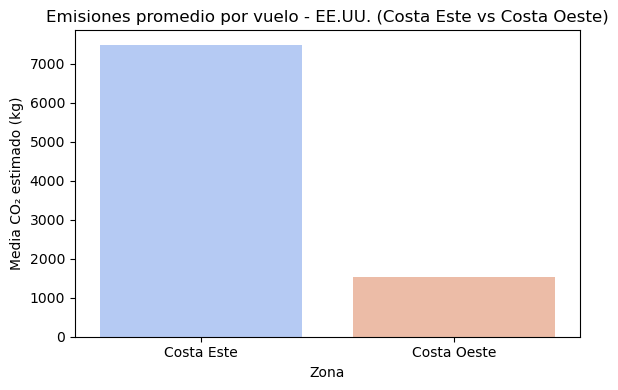

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(data=emisiones_usa, x="zona_usa", y="co2_estimado_kg", palette="coolwarm")
plt.title("Emisiones promedio por vuelo - EE.UU. (Costa Este vs Costa Oeste)")
plt.xlabel("Zona")
plt.ylabel("Media CO₂ estimado (kg)")
plt.tight_layout()
plt.show()


### Rutas con mayor huella de carbono

In [12]:
# Crear columna ruta zona_horaria_origen → destino
df_emisiones_validos["ruta_zona"] = df_emisiones_validos["zona_salida"] + " → " + df_emisiones_validos["zona_llegada"]

# Agrupar por ruta de zonas
ruta_zona_emisiones = df_emisiones_validos.groupby("ruta_zona").agg(
    vuelos=("ident", "count"),
    media_emisiones=("co2_estimado_kg", "mean"),
    total_emisiones=("co2_estimado_kg", "sum")
).sort_values(by="total_emisiones", ascending=False).head(10).round(2)

ruta_zona_emisiones


C:\Users\janto\AppData\Local\Temp\ipykernel_10300\2939754420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["ruta_zona"] = df_emisiones_validos["zona_salida"] + " → " + df_emisiones_validos["zona_llegada"]


,vuelos,media_emisiones,total_emisiones
ruta_zona,,,
CEST → CEST,347,3752.16,1302000.00
CST → CST,235,5481.96,1288261.67
+07 → KST,16,32198.54,515176.67
-03 → -03,95,4809.82,456932.50
CST → EDT,12,34229.44,410753.33
MDT → EDT,14,24232.98,339261.67
AST → EDT,15,18542.22,278133.33
EDT → EDT,50,5359.78,267989.17
WEST → CEST,32,7476.25,239240.00


### Sankey 

In [13]:
aeropuerto_to_pais = {
    "Madrid-Barajas": "ESPAÑA",
    "Barcelona": "ESPAÑA",
    "París-Charles de Gaulle": "FRANCIA",
    "París-Orly": "FRANCIA",
    "Londres-Gatwick": "REINO UNIDO",
    "Londres-Stansted": "REINO UNIDO",
    "Int'l John F. Kennedy": "ESTADOS UNIDOS",
    "Int'l de Dallas-Fort Worth": "ESTADOS UNIDOS",
    "Int'l de São Paulo-Guarulhos": "BRASIL",
    "Int'l de Tocumen": "PANAMÁ",
    "Int'l de Incheon": "COREA DEL SUR",
    "Int'l de Kuala Lumpur": "MALASIA",
    "Shenzhen Bao'an Int'l": "CHINA",
    "Ámsterdam-Schiphol": "PAÍSES BAJOS",
    "Bruselas-Zaventem": "BÉLGICA",
    "Viena": "AUSTRIA",
    "Lisboa": "PORTUGAL",
    "Oslo-Gardermoen": "NORUEGA",
    "Roma-Fiumicino": "ITALIA",
    "Milán-Malpensa": "ITALIA",
    "Int'l Toronto Pearson": "CANADÁ",
    "Int'l de Chongqing Jiangbei": "CHINA",
    "Int'l Indira Gandhi": "INDIA",
    "Int'l Mohammed V": "MARRUECOS",
    "Xi'an Xianyang Int'l": "CHINA",
    "Int'l Kingsford Smith": "AUSTRALIA",
    "Hangzhou Xiaoshan Int'l": "CHINA",
   "Int'l John F. Kennedy": "ESTADOS UNIDOS",
    "Int'l de Los Ángeles": "ESTADOS UNIDOS",
    "Int'l Toronto Pearson": "CANADÁ",
    "Int'l de Dubái": "EMIRATOS ÁRABES UNIDOS",
    "Int'l de Kuala Lumpur": "MALASIA",
    "Int'l de Hong Kong": "CHINA",
    "Int'l Chicago-O'Hare": "ESTADOS UNIDOS",
    "Madrid-Barajas": "ESPAÑA",
    "Istanbul Airport": "TURQUÍA",
    "Int'l Suvarnabhumi": "TAILANDIA",
    "París-Charles de Gaulle": "FRANCIA",
    "Hamad Int'l": "CATAR",
    "Int'l de Shanghái-Pudong": "CHINA",
    "Int'l Indira Gandhi": "INDIA",
    "Ámsterdam-Schiphol": "PAÍSES BAJOS",
    "Int'l de Seattle-Tacoma": "ESTADOS UNIDOS",
    "Int'l de Dallas-Fort Worth": "ESTADOS UNIDOS",
    "Int'l de Orlando": "ESTADOS UNIDOS",
    "Int'l Libertad de Newark": "ESTADOS UNIDOS",
    "Int'l de Miami": "ESTADOS UNIDOS",
    "Int'l de Narita": "JAPÓN",
    "Int'l de São Paulo-Guarulhos": "BRASIL",
    "Int'l Logan": "ESTADOS UNIDOS",
    "Int'l de Taiwán Taoyuan": "TAIWÁN",
    "Fráncfort del Meno": "ALEMANIA",
    "Int'l Ted Stevens Anchorage": "ESTADOS UNIDOS",
    "Int'l Pierre Elliott Trudeau": "CANADÁ",
    "Int'l de Tokio": "JAPÓN",
    "Int'l Washington-Dulles": "ESTADOS UNIDOS",
    "Intercontinental George Bush": "ESTADOS UNIDOS",
    "Londres-Gatwick": "REINO UNIDO",
    "Int'l de San Francisco": "ESTADOS UNIDOS",
    "Int'l Rey Abdulaziz": "ARABIA SAUDITA",
    "Int'l Ninoy Aquino": "FILIPINAS",
    "Varsovia-Frédéric Chopin": "POLONIA",
    "Lisboa": "PORTUGAL",
    "Int'l El Dorado": "COLOMBIA",
    "Int'l Rey Khalid": "ARABIA SAUDITA",
    "Copenhague-Kastrup": "DINAMARCA",
    "Viena": "AUSTRIA",
    "Barcelona": "ESPAÑA",
    "Int'l de Pekín": "CHINA",
    "Int'l de Melbourne": "AUSTRALIA",
    "Int'l de la Ciudad de México": "MÉXICO",
    "Int'l de El Cairo": "EGIPTO",
    "Int'l de Vancouver": "CANADÁ",
    "Int'l de Filadelfia": "ESTADOS UNIDOS",
    "Int'l Chhatrapati Shivaji": "INDIA",
    "Int'l Ben Gurión": "ISRAEL",
    "Int'l Sky Harbor": "ESTADOS UNIDOS",
    "Int'l de Incheon": "COREA DEL SUR",
    "Londres-Heathrow": "REINO UNIDO",
    "Int'l de Singapur": "SINGAPUR",
    "Int'l Hartsfield-Jackson": "ESTADOS UNIDOS",
    "Int'l Kingsford Smith": "AUSTRALIA",
    "Int'l de Kansai": "JAPÓN",
    "Brisbane": "AUSTRALIA",
    "Int'l McCarran": "ESTADOS UNIDOS",
    "Int'l de Tocumen": "PANAMÁ",
    "Int'l Comodoro Arturo Merino Benítez": "CHILE",
    "Bruselas-Zaventem": "BÉLGICA",
    "Int'l de Zúrich": "SUIZA",
    "Int'l de Denver": "ESTADOS UNIDOS",
    "Dublín": "IRLANDA",
    "Int'l de Gimhae": "COREA DEL SUR",
    "Málaga": "ESPAÑA",
    "Oslo-Gardermoen": "NORUEGA",
    "Int'l de Detroit": "ESTADOS UNIDOS",
    "Int'l Fort Lauderdale-Hollywood": "ESTADOS UNIDOS",
    "Antalya": "TURQUÍA",
    "Int'l de Abu Dabi": "EMIRATOS ÁRABES UNIDOS",
    "Int'l de Moscú-Sheremétievo": "RUSIA",
    "Int'l de Tan Son Nhat": "VIETNAM",
    "París-Orly": "FRANCIA",
    "Int'l de Auckland": "NUEVA ZELANDA",
    "Estocolmo-Arlanda": "SUECIA",
    "Int'l de Munich-Franz Josef Strauss": "ALEMANIA",
    "Shenzhen Bao'an Int'l": "CHINA",
    "Don Muang Int'l": "TAILANDIA",
    "Helsinki-Vantaa": "FINLANDIA",
    "Int'l Eleftherios Venizelos": "GRECIA",
    "Int'l de Charlotte-Douglas": "ESTADOS UNIDOS",
    "Roma-Fiumicino": "ITALIA",
    "Int'l de Honolulu": "ESTADOS UNIDOS",
    "Chengdu Tianfu Int'l": "CHINA",
    "Int'l de San Diego": "ESTADOS UNIDOS",
    "Púlkovo": "RUSIA",
    "Jorge Chávez Int'l": "PERÚ",
    "Int'l de Nội Bài": "VIETNAM",
    "Milán-Malpensa": "ITALIA",
    "Int'l de Bucarest-Henri Coandă": "RUMANIA",
    "Int'l de Guadalajara": "MÉXICO",
    "Budapest-Ferihegy": "HUNGRÍA",
    "Mánchester": "REINO UNIDO",
    "Int'l de Ginebra": "SUIZA",
    "Berlín-Schönefeld": "ALEMANIA",
    "Hangzhou Xiaoshan Int'l": "CHINA",
    "Int'l de Campinas": "BRASIL",
    "Hamburgo": "ALEMANIA",
    "Int'l de Boston": "ESTADOS UNIDOS",
    "Int'l de Houston-Hobby": "ESTADOS UNIDOS",
    "Int'l de Baltimore-Washington": "ESTADOS UNIDOS",
    "Int'l de Las Vegas": "ESTADOS UNIDOS",
    "Int'l de Portland": "ESTADOS UNIDOS",
    "Int'l de Salt Lake City": "ESTADOS UNIDOS",
    "Int'l de Kansas City": "ESTADOS UNIDOS",
    "Int'l de Minneapolis-Saint Paul": "ESTADOS UNIDOS",
    "Int'l de Tampa": "ESTADOS UNIDOS",
    "Int'l de Raleigh-Durham": "ESTADOS UNIDOS",
    "Int'l de Cincinnati": "ESTADOS UNIDOS",
    "Int'l de San Juan": "PUERTO RICO",
    "Int'l de Montevideo": "URUGUAY",
    "Int'l de Lima": "PERÚ",
    "Int'l de Quito": "ECUADOR",
    "Int'l de Santiago de Chile": "CHILE",
    "Int'l de Buenos Aires-Ezeiza": "ARGENTINA",
    "Int'l de Bogotá": "COLOMBIA",
    "Int'l de Caracas": "VENEZUELA",
    "Int'l de Panamá": "PANAMÁ",
    "Int'l de La Habana": "CUBA",
    "Int'l de San José": "COSTA RICA",
    "Int'l de Punta Cana": "REPÚBLICA DOMINICANA",
    "Int'l de Santo Domingo": "REPÚBLICA DOMINICANA",
    "Int'l de Nassau": "BAHAMAS",
    "Int'l de Aruba": "ARUBA",
    "Int'l de Reykjavik-Keflavik": "ISLANDIA",
    "Int'l de Praga": "CHEQUIA",
    "Int'l de Zagreb": "CROACIA",
    "Int'l de Sofía": "BULGARIA",
    "Int'l de Riga": "LETONIA",
    "Int'l de Vilna": "LITUANIA",
    "Int'l de Belgrado": "SERBIA",
    "Int'l de Ljubljana": "ESLOVENIA",
    "Int'l de Bratislava": "ESLOVAQUIA",
    "Int'l de Tallin": "ESTONIA",
    "Int'l de Anchorage": "ESTADOS UNIDOS",
    "Int'l de Phoenix-Mesa Gateway": "ESTADOS UNIDOS",
    "Int'l de San José del Cabo": "MÉXICO",
    "Int'l de Puerto Vallarta": "MÉXICO",
    "Int'l de Cancún": "MÉXICO",
    "Int'l de Monterrey": "MÉXICO",
    "Int'l de Tijuana": "MÉXICO",
    "Int'l de Cozumel": "MÉXICO",
    "Int'l de Mérida": "MÉXICO",
    "Int'l de Mazatlán": "MÉXICO",
    "Int'l de Liberia": "COSTA RICA",
    "Int'l de Belice": "BELICE",
    "Int'l de Managua": "NICARAGUA",
    "Int'l de Tegucigalpa": "HONDURAS",
    "Int'l de San Salvador": "EL SALVADOR",
    "Int'l de Port-au-Prince": "HAITÍ",
    "Int'l de Kingston": "JAMAICA",
    "Int'l de George Town": "ISLAS CAIMÁN",
    "Int'l de Providenciales": "ISLAS TURCAS Y CAICOS",
    "Int'l de Bridgetown": "BARBADOS",
    "Int'l de Fort-de-France": "MARTINICA",
    "Int'l de Pointe-à-Pitre": "GUADALUPE",
    "Int'l de Oranjestad": "ARUBA",
    "Int'l de Willemstad": "CURAZAO",
    "Int'l de Philipsburg": "SINT MAARTEN",
    "Int'l de Larnaca": "CHIPRE",
    "Int'l de Tiflis": "GEORGIA",
    "Int'l de Bakú": "AZERBAIYÁN",
    "Int'l de Almatý": "KAZAJISTÁN",
    "Int'l de Taskent": "UZBEKISTÁN",
    "Int'l de Ereván": "ARMENIA"

}

# Aplicar el mapeo
df_emisiones_validos["pais_origen"] = df_emisiones_validos["origen"].map(aeropuerto_to_pais)
df_emisiones_validos["pais_destino"] = df_emisiones_validos["destino"].map(aeropuerto_to_pais)
df_emisiones_validos["origen"].value_counts()


C:\Users\janto\AppData\Local\Temp\ipykernel_10300\418342010.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["pais_origen"] = df_emisiones_validos["origen"].map(aeropuerto_to_pais)
C:\Users\janto\AppData\Local\Temp\ipykernel_10300\418342010.py:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["pais_destino"] = df_emisiones_validos["destino"].map(aeropuerto_to_pais)


origen
Ámsterdam-Schiphol (AMS / EHAM)       33
Barcelona (BCN / LEBL)                29
París-Orly (ORY / LFPO)               27
Jorge Chávez Int'l (LIM / SPJC)       25
Int'l Soekarno-Hatta (CGK / WIII)     23
                                      ..
London Southend (SEN / EGMC)           1
Nagoya-Chubu Centrair (NGO / RJGG)     1
Int'l de Liverpool (LPL / EGGP)        1
Leeds Bradford (LBA / EGNM)            1
Stavanger, Sola (SVG / ENZV)           1
Name: count, Length: 597, dtype: int64

In [14]:
# Aplicar mapeo a columnas de origen y destino
df_emisiones_validos["pais_origen"] = df_emisiones_validos["origen"].map(aeropuerto_to_pais)
df_emisiones_validos["pais_destino"] = df_emisiones_validos["destino"].map(aeropuerto_to_pais)


C:\Users\janto\AppData\Local\Temp\ipykernel_10300\3463780590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["pais_origen"] = df_emisiones_validos["origen"].map(aeropuerto_to_pais)
C:\Users\janto\AppData\Local\Temp\ipykernel_10300\3463780590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["pais_destino"] = df_emisiones_validos["destino"].map(aeropuerto_to_pais)


In [15]:
# Aeropuertos sin país asignado (origen o destino)
print("Orígenes sin país asignado:")
print(df_emisiones_validos[df_emisiones_validos["pais_origen"].isna()]["origen"].value_counts())

print("\nDestinos sin país asignado:")
print(df_emisiones_validos[df_emisiones_validos["pais_destino"].isna()]["destino"].value_counts())


Orígenes sin país asignado:
origen
Ámsterdam-Schiphol (AMS / EHAM)       33
Barcelona (BCN / LEBL)                29
París-Orly (ORY / LFPO)               27
Jorge Chávez Int'l (LIM / SPJC)       25
Int'l Soekarno-Hatta (CGK / WIII)     23
                                      ..
London Southend (SEN / EGMC)           1
Nagoya-Chubu Centrair (NGO / RJGG)     1
Int'l de Liverpool (LPL / EGGP)        1
Leeds Bradford (LBA / EGNM)            1
Stavanger, Sola (SVG / ENZV)           1
Name: count, Length: 597, dtype: int64

Destinos sin país asignado:
destino
Londres-Gatwick (LGW / EGKK)                 24
Int'l de Incheon (ICN / RKSI)                23
Int'l de São Paulo-Guarulhos (GRU / SBGR)    22
Oslo-Gardermoen (OSL / ENGM)                 19
Int'l de Kuala Lumpur (KUL / WMKK)           19
                                             ..
Brest Bretagne (BES / LFRB)                   1
Strasbourg Entzheim (SXB / LFST)              1
Namangan (NMA / UTFN)                         1
Chulma

In [16]:
import re

# Función para limpiar el nombre del aeropuerto
def limpiar_nombre_aeropuerto(nombre):
    if pd.isna(nombre):
        return nombre
    # Elimina todo lo que está entre paréntesis
    return re.sub(r"\s*\(.*?\)", "", nombre).strip()

# Aplicar a origen y destino
df_emisiones_validos["origen_limpio"] = df_emisiones_validos["origen"].apply(limpiar_nombre_aeropuerto)
df_emisiones_validos["destino_limpio"] = df_emisiones_validos["destino"].apply(limpiar_nombre_aeropuerto)


C:\Users\janto\AppData\Local\Temp\ipykernel_10300\1933009727.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["origen_limpio"] = df_emisiones_validos["origen"].apply(limpiar_nombre_aeropuerto)
C:\Users\janto\AppData\Local\Temp\ipykernel_10300\1933009727.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["destino_limpio"] = df_emisiones_validos["destino"].apply(limpiar_nombre_aeropuerto)


In [17]:
# Volver a aplicar el mapeo usando los nombres limpios
df_emisiones_validos["pais_origen"] = df_emisiones_validos["origen_limpio"].map(aeropuerto_to_pais)
df_emisiones_validos["pais_destino"] = df_emisiones_validos["destino_limpio"].map(aeropuerto_to_pais)


C:\Users\janto\AppData\Local\Temp\ipykernel_10300\941731496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["pais_origen"] = df_emisiones_validos["origen_limpio"].map(aeropuerto_to_pais)
C:\Users\janto\AppData\Local\Temp\ipykernel_10300\941731496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["pais_destino"] = df_emisiones_validos["destino_limpio"].map(aeropuerto_to_pais)


In [18]:
# Revisar si aún quedan NaNs
print("Orígenes sin país asignado (post-limpieza):")
print(df_emisiones_validos[df_emisiones_validos["pais_origen"].isna()]["origen_limpio"].value_counts().head(10))

print("\nDestinos sin país asignado (post-limpieza):")
print(df_emisiones_validos[df_emisiones_validos["pais_destino"].isna()]["destino_limpio"].value_counts().head(10))


Orígenes sin país asignado (post-limpieza):
origen_limpio
Int'l Soekarno-Hatta                    23
Int'l de Calgary                        18
Beijing Daxing International Airport    17
São Paulo-Congonhas                     17
Palma de Mallorca                       15
Milán-Linate                            12
Int'l Cantón Baiyun                     12
Aeroparque Jorge Newbery                12
Int'l de Sharjah                        12
Londres-Luton                           10
Name: count, dtype: int64

Destinos sin país asignado (post-limpieza):
destino_limpio
Int'l Soekarno-Hatta                     15
Basilea-Mulhouse                         14
Palma de Mallorca                        13
São Paulo-Congonhas                      12
Nápoles-Capodichino                      11
Birmingham Int'l                         10
Faro                                     10
Stuttgart Echterdingen                    9
Int'l Presidente Juscelino Kubitschek     9
Alicante                      

In [19]:
aeropuerto_to_pais.update({
    "Int'l Soekarno-Hatta": "INDONESIA",
    "Int'l de Calgary": "CANADÁ",
    "Beijing Daxing International Airport": "CHINA",
    "São Paulo-Congonhas": "BRASIL",
    "Palma de Mallorca": "ESPAÑA",
    "Milán-Linate": "ITALIA",
    "Int'l Cantón Baiyun": "CHINA",
    "Aeroparque Jorge Newbery": "ARGENTINA",
    "Int'l de Sharjah": "EMIRATOS ÁRABES UNIDOS",
    "Londres-Luton": "REINO UNIDO",
    "Basilea-Mulhouse": "SUIZA",
    "Nápoles-Capodichino": "ITALIA",
    "Birmingham Int'l": "REINO UNIDO",
    "Faro": "PORTUGAL",
    "Stuttgart Echterdingen": "ALEMANIA",
    "Int'l Presidente Juscelino Kubitschek": "BRASIL",
    "Alicante": "ESPAÑA"
})


In [20]:
df_emisiones_validos["pais_origen"] = df_emisiones_validos["origen_limpio"].map(aeropuerto_to_pais)
df_emisiones_validos["pais_destino"] = df_emisiones_validos["destino_limpio"].map(aeropuerto_to_pais)


C:\Users\janto\AppData\Local\Temp\ipykernel_10300\621394326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["pais_origen"] = df_emisiones_validos["origen_limpio"].map(aeropuerto_to_pais)
C:\Users\janto\AppData\Local\Temp\ipykernel_10300\621394326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["pais_destino"] = df_emisiones_validos["destino_limpio"].map(aeropuerto_to_pais)


In [21]:
print("Orígenes sin país asignado (final):")
print(df_emisiones_validos[df_emisiones_validos["pais_origen"].isna()]["origen_limpio"].value_counts().head(10))

print("\nDestinos sin país asignado (final):")
print(df_emisiones_validos[df_emisiones_validos["pais_destino"].isna()]["destino_limpio"].value_counts().head(10))


Orígenes sin país asignado (final):
origen_limpio
Novosibirsk Tolmachevo       9
Sevilla                      9
Tenerife Sur                 8
Int'l de Moscú-Domodédovo    8
Perth                        7
Int'l de Đà Nẵng             7
Changchun Longjia Int'l      7
Int'l de Ürümqi              7
Oporto                       7
Int'l de Austin-Bergstrom    7
Name: count, dtype: int64

Destinos sin país asignado (final):
destino_limpio
Toulouse-Blagnac             8
Sevilla                      8
Marrakech-Menara             8
Int'l Niza Costa Azul        8
Int'l de Galeão              8
Bilbao                       7
Int'l de Sacramento          7
Lhasa Gonggar                7
Int'l de Austin-Bergstrom    7
Int'l de Tianjin Binhai      7
Name: count, dtype: int64


In [22]:
aeropuerto_to_pais.update({
    "Novosibirsk Tolmachevo": "RUSIA",
    "Sevilla": "ESPAÑA",
    "Tenerife Sur": "ESPAÑA",
    "Int'l de Moscú-Domodédovo": "RUSIA",
    "Perth": "AUSTRALIA",
    "Int'l de Đà Nẵng": "VIETNAM",
    "Changchun Longjia Int'l": "CHINA",
    "Int'l de Ürümqi": "CHINA",
    "Oporto": "PORTUGAL",
    "Int'l de Austin-Bergstrom": "ESTADOS UNIDOS",

    "Toulouse-Blagnac": "FRANCIA",
    "Marrakech-Menara": "MARRUECOS",
    "Int'l Niza Costa Azul": "FRANCIA",
    "Int'l de Galeão": "BRASIL",
    "Bilbao": "ESPAÑA",
    "Int'l de Sacramento": "ESTADOS UNIDOS",
    "Lhasa Gonggar": "CHINA",
    "Int'l de Tianjin Binhai": "CHINA"
})


In [23]:
df_emisiones_validos["pais_origen"] = df_emisiones_validos["origen_limpio"].map(aeropuerto_to_pais)
df_emisiones_validos["pais_destino"] = df_emisiones_validos["destino_limpio"].map(aeropuerto_to_pais)


C:\Users\janto\AppData\Local\Temp\ipykernel_10300\621394326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["pais_origen"] = df_emisiones_validos["origen_limpio"].map(aeropuerto_to_pais)
C:\Users\janto\AppData\Local\Temp\ipykernel_10300\621394326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["pais_destino"] = df_emisiones_validos["destino_limpio"].map(aeropuerto_to_pais)


In [24]:
print("Orígenes sin país asignado (FINAL FINAL):")
print(df_emisiones_validos[df_emisiones_validos["pais_origen"].isna()]["origen_limpio"].value_counts())

print("\nDestinos sin país asignado (FINAL FINAL):")
print(df_emisiones_validos[df_emisiones_validos["pais_destino"].isna()]["destino_limpio"].value_counts())


Orígenes sin país asignado (FINAL FINAL):
origen_limpio
Int'l Sabiha Gökçen                       7
Christchurch Int'l                        7
Int'l de Düsseldorf                       7
Gran Canaria                              6
Ibiza                                     6
                                         ..
Int'l de Saskatoon John G. Diefenbaker    1
Copernicus Wrocław                        1
Blaise Diagne                             1
Int'l De Torreón Francisco Sarabia        1
Stavanger, Sola                           1
Name: count, Length: 453, dtype: int64

Destinos sin país asignado (FINAL FINAL):
destino_limpio
Int'l de Düsseldorf         7
Adler-Sochi Int'l           6
Int'l Houari Boumedienne    6
Christchurch Int'l          6
Int'l de Jeju               6
                           ..
Zadar                       1
Khudzhand                   1
Brest Bretagne              1
Strasbourg Entzheim         1
Harstad/Narvik, Evenes      1
Name: count, Length: 461, dtype: 

In [25]:
# Agrupamos los flujos válidos entre países
df_flujo = df_emisiones_validos.dropna(subset=["pais_origen", "pais_destino"])
df_flujo = df_flujo[df_flujo["pais_origen"] != df_flujo["pais_destino"]]

# Flujo por nº de vuelos (puedes cambiar a emisiones si prefieres)
df_flujo_count = df_flujo.groupby(["pais_origen", "pais_destino"]).size().reset_index(name="n_vuelos")

# Top 15 países con más apariciones (origen + destino)
top_paises = pd.Series(
    pd.concat([df_flujo_count["pais_origen"], df_flujo_count["pais_destino"]])
    .value_counts()
    .head(15)
).index.tolist()

# Filtramos solo relaciones entre países top
df_flujo_top = df_flujo_count[
    (df_flujo_count["pais_origen"].isin(top_paises)) & 
    (df_flujo_count["pais_destino"].isin(top_paises))
]


In [26]:
# Asignación manual tipo globo horario (simplificada para el ejemplo)
pais_to_hora = {
    "JAPÓN": 0,
    "COREA DEL SUR": 1,
    "CHINA": 2,
    "AUSTRALIA": 3,
    "INDIA": 4,
    "RUSIA": 5,
    "EMIRATOS ÁRABES UNIDOS": 6,
    "TURQUÍA": 7,
    "ALEMANIA": 8,
    "FRANCIA": 9,
    "ESPAÑA": 10,
    "REINO UNIDO": 11,
    "BRASIL": 12,
    "ARGENTINA": 13,
    "CANADÁ": 14,
    "ESTADOS UNIDOS": 15,
    # Puedes completar o ajustar
}

# Mapear a df
df_flujo_top["hora_origen"] = df_flujo_top["pais_origen"].map(pais_to_hora)
df_flujo_top["hora_destino"] = df_flujo_top["pais_destino"].map(pais_to_hora)


C:\Users\janto\AppData\Local\Temp\ipykernel_10300\2613197294.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flujo_top["hora_origen"] = df_flujo_top["pais_origen"].map(pais_to_hora)
C:\Users\janto\AppData\Local\Temp\ipykernel_10300\2613197294.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flujo_top["hora_destino"] = df_flujo_top["pais_destino"].map(pais_to_hora)


In [27]:
# Asegúrate de tener esta columna (si no la tienes ya)
df_emisiones_validos['hora_salida_num'] = pd.to_datetime(df_emisiones_validos['hora_salida'], errors='coerce').dt.hour

# Hora promedio de salida por país de origen
horas_por_pais = df_emisiones_validos.groupby("pais_origen")["hora_salida_num"].mean().dropna().round().astype(int)


C:\Users\janto\AppData\Local\Temp\ipykernel_10300\914055914.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_emisiones_validos['hora_salida_num'] = pd.to_datetime(df_emisiones_validos['hora_salida'], errors='coerce').dt.hour
C:\Users\janto\AppData\Local\Temp\ipykernel_10300\914055914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos['hora_salida_num'] = pd.to_datetime(df_emisiones_validos['hora_salida'], errors='coerce').dt.hour


In [28]:
# Agrupar y contar vuelos entre países
df_flujo = df_emisiones_validos.groupby(["pais_origen", "pais_destino"]).size().reset_index(name="n_vuelos")

# Filtrar vuelos válidos
df_flujo = df_flujo[
    (df_flujo["pais_origen"].notna()) &
    (df_flujo["pais_destino"].notna()) &
    (df_flujo["pais_origen"] != df_flujo["pais_destino"])
]

# Top países por total de vuelos
top_paises = pd.concat([
    df_flujo.groupby("pais_origen")["n_vuelos"].sum(),
    df_flujo.groupby("pais_destino")["n_vuelos"].sum()
], axis=1).fillna(0).sum(axis=1).sort_values(ascending=False).head(20).index.tolist()

# Filtrar solo vuelos entre esos países
df_top = df_flujo[
    df_flujo["pais_origen"].isin(top_paises) & df_flujo["pais_destino"].isin(top_paises)
]


In [29]:
# Crear lista única de países
paises = sorted(set(df_top["pais_origen"]).union(df_top["pais_destino"]))
pais_idx = {pais: i for i, pais in enumerate(paises)}

# Crear matriz de adyacencia
import numpy as np

n = len(paises)
matrix = np.zeros((n, n), dtype=int)

for _, row in df_top.iterrows():
    i = pais_idx[row["pais_origen"]]
    j = pais_idx[row["pais_destino"]]
    matrix[i][j] = row["n_vuelos"]


### 1. Análisis medioambiental avanzado

Aquí analizaré las emisiones agregadas de CO2 por a) Operador, b) País de origen y destino y Ruta

### a) Por Operador

In [30]:
resumen_operador = df_emisiones_validos.groupby("ident").agg(
    total_vuelos=("ident", "count"),
    tipos_diferentes=("tipo", pd.Series.nunique),
    media_emisiones_kg=("co2_estimado_kg", "mean"),
    total_emisiones_kg=("co2_estimado_kg", "sum")
).sort_values(by="total_emisiones_kg", ascending=False).head(10).round(2)

resumen_operador


,total_vuelos,tipos_diferentes,media_emisiones_kg,total_emisiones_kg
ident,,,,
CEB5065,1,1,48666.67,48666.67
AMX178,1,1,45976.67,45976.67
DAL1978,1,1,44460.00,44460.00
CHH440,1,1,43073.33,43073.33
CXA810,1,1,42423.33,42423.33
AAL1494,1,1,42076.67,42076.67
AAL1338,1,1,41946.67,41946.67
SBI5219,1,1,41643.33,41643.33
SWA1013,1,1,41522.50,41522.50


C:\Users\janto\AppData\Local\Temp\ipykernel_10300\1755092702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


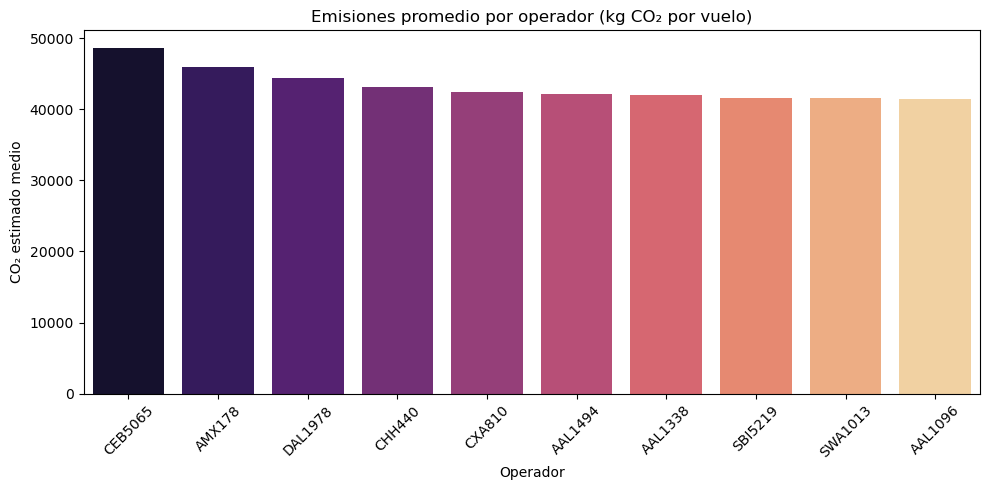

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=resumen_operador.reset_index(),
    x="ident", y="media_emisiones_kg", palette="magma"
)
plt.title("Emisiones promedio por operador (kg CO₂ por vuelo)")
plt.xlabel("Operador")
plt.ylabel("CO₂ estimado medio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### b) Agrupación por ruta origen --> destino

In [32]:
# Normalizar nombres
df_emisiones_validos["origen_norm"] = df_emisiones_validos["origen"].astype(str).str.strip().str.upper()
df_emisiones_validos["destino_norm"] = df_emisiones_validos["destino"].astype(str).str.strip().str.upper()

# Crear columna de ruta
df_emisiones_validos["ruta_od"] = df_emisiones_validos["origen_norm"] + " → " + df_emisiones_validos["destino_norm"]

# Agrupar por ruta
resumen_ruta_od = df_emisiones_validos.groupby("ruta_od").agg(
    vuelos=("ident", "count"),
    media_emisiones=("co2_estimado_kg", "mean"),
    total_emisiones=("co2_estimado_kg", "sum")
).sort_values(by="total_emisiones", ascending=False).head(15).round(2)

resumen_ruta_od


C:\Users\janto\AppData\Local\Temp\ipykernel_10300\1979052223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["origen_norm"] = df_emisiones_validos["origen"].astype(str).str.strip().str.upper()
C:\Users\janto\AppData\Local\Temp\ipykernel_10300\1979052223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emisiones_validos["destino_norm"] = df_emisiones_validos["destino"].astype(str).str.strip().str.upper()
C:\Users\janto\AppData\Local\Temp\ipykernel_10300\1979052223.py:6: Setting

,vuelos,media_emisiones,total_emisiones
ruta_od,,,
INT'L DE ĐÀ NẴNG (DAD / VVDN) → INT'L DE INCHEON (ICN / RKSI),4,29401.67,117606.67
INT'L DE CALGARY (CYYC) → INT'L TORONTO PEARSON (CYYZ),4,24434.79,97739.17
INT'L SUVARNABHUMI (BKK / VTBS) → INT'L DE GIMHAE (PUS / RKPK),2,36205.00,72410.00
CAM RANH (CXR / VVCR) → INT'L DE GIMHAE (PUS / RKPK),2,33728.33,67456.67
NUEVO AEROPUERTO DE CHITOSE (CTS / RJCC) → INT'L DE INCHEON (ICN / RKSI),2,30246.67,60493.33
INT'L DE TAIWÁN TAOYUAN (TPE / RCTP) → INT'L DE GIMHAE (PUS / RKPK),2,28730.00,57460.00
BRISBANE (BNE / YBBN) → INT'L DE ADELAIDA (ADL / YPAD),2,26866.67,53733.33
INT'L DE CALGARY (CYYC) → INT'L HARTSFIELD-JACKSON (KATL),2,25627.50,51255.00
INT'L DE NARITA (NRT / RJAA) → MACTAN-CEBU INT'L (CEB / RPVM),1,48666.67,48666.67


### Estudio 2

#### Librerias

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


#### Clustering de rutas por impacto ecológico

In [34]:
# Clustering de rutas ecológicas
df_rutas = df_emisiones_validos.copy()
df_rutas = df_rutas.dropna(subset=["origen", "destino", "co2_estimado_kg", "duración_(min)", "tipo", "salida_datetime"])

df_rutas["ruta"] = df_rutas["origen"].astype(str).str.strip() + " → " + df_rutas["destino"].astype(str).str.strip()

resumen_rutas = df_rutas.groupby("ruta").agg({
    "co2_estimado_kg": "mean",
    "duración_(min)": "mean",
    "ident": "count"
}).rename(columns={"ident": "num_vuelos"}).reset_index()

X = resumen_rutas[["co2_estimado_kg", "duración_(min)", "num_vuelos"]]
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
resumen_rutas["cluster"] = kmeans.fit_predict(X_scaled)


### Visualización

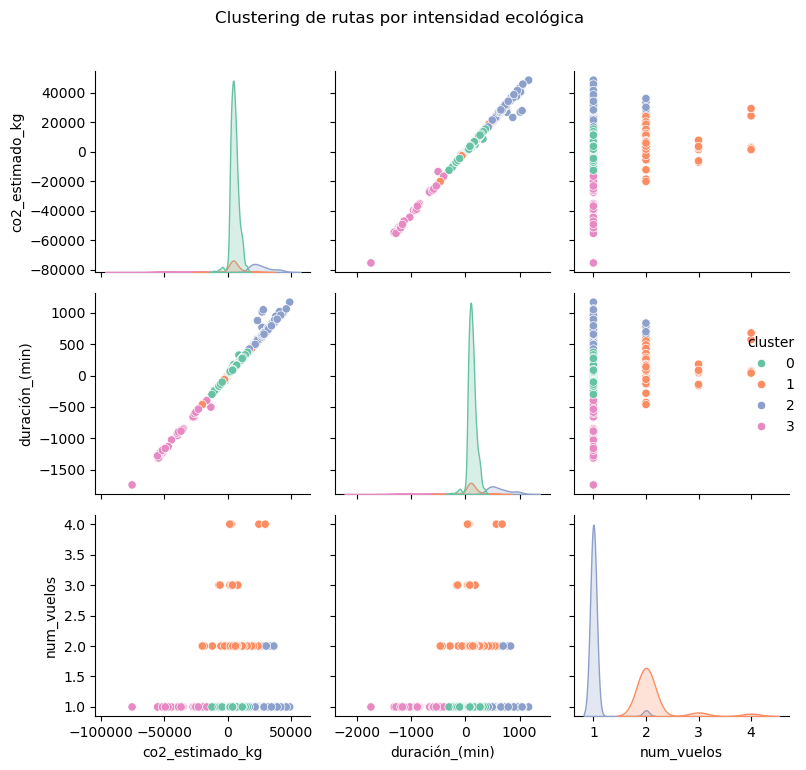

In [35]:
# Visualización de clústeres
sns.pairplot(resumen_rutas, hue="cluster", vars=["co2_estimado_kg", "duración_(min)", "num_vuelos"], palette="Set2")
plt.suptitle("Clustering de rutas por intensidad ecológica", y=1.02)
plt.tight_layout()
plt.show()


### Predicción de emsiones modelo basado en machine learning

In [36]:
# Predicción de emisiones
df_pred = df_emisiones_validos[["tipo", "zona_horaria_salida", "zona_horaria_llegada", "duración_(min)", "ident", "co2_estimado_kg"]].dropna()
df_pred["tipo"] = df_pred["tipo"].astype(str).str.strip()
df_pred["zona_horaria_salida"] = df_pred["zona_horaria_salida"].astype(str).str.strip()
df_pred["zona_horaria_llegada"] = df_pred["zona_horaria_llegada"].astype(str).str.strip()

X_pred = pd.get_dummies(df_pred.drop(columns="co2_estimado_kg"), drop_first=True)
y_pred = df_pred["co2_estimado_kg"]

X_train, X_test, y_train, y_test = train_test_split(X_pred, y_pred, test_size=0.2, random_state=42)
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_test)
print(f"MAE (Random Forest): {mean_absolute_error(y_test, y_pred_rf):.2f} kg CO₂")


MAE (Random Forest): 150.76 kg CO₂


### Comparación entre modelos de avión 

C:\Users\janto\AppData\Local\Temp\ipykernel_10300\4079190722.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparacion_modelos.reset_index(), x="tipo", y="co2_estimado_kg", palette="viridis")


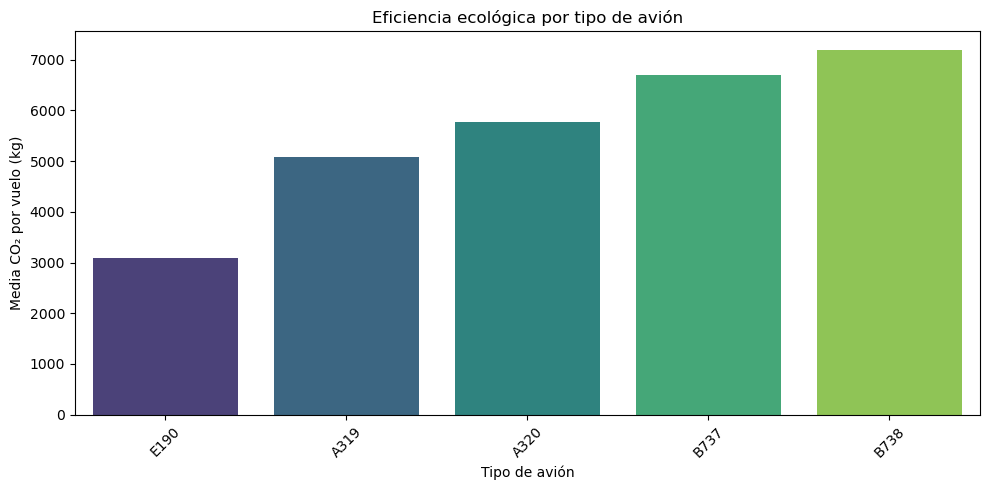

In [37]:
# Comparación de eficiencia por tipo de avión
comparacion_modelos = df_emisiones_validos.groupby("tipo").agg({
    "co2_estimado_kg": "mean",
    "duración_(min)": "mean",
    "ident": "count"
}).rename(columns={"ident": "num_vuelos"}).sort_values(by="co2_estimado_kg")

plt.figure(figsize=(10, 5))
sns.barplot(data=comparacion_modelos.reset_index(), x="tipo", y="co2_estimado_kg", palette="viridis")
plt.title("Eficiencia ecológica por tipo de avión")
plt.ylabel("Media CO₂ por vuelo (kg)")
plt.xlabel("Tipo de avión")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Visualización geoespacial (basados en mapa)

In [38]:
# Visualización geoespacial base
df_mapa = df_emisiones_validos.dropna(subset=["origen", "destino", "co2_estimado_kg"])
df_mapa = df_mapa[df_mapa["origen"].str.contains("/") & df_mapa["destino"].str.contains("/")]

df_mapa["iata_origen"] = df_mapa["origen"].str.extract(r"\((\w{3})")
df_mapa["iata_destino"] = df_mapa["destino"].str.extract(r"\((\w{3})")

# Para continuar necesitarás un archivo con coordenadas por código IATA:
# columnas: iata, lat, lon

# Ejemplo de uso con folium:
# map = folium.Map(location=[20, 0], zoom_start=2)
# folium.CircleMarker(location=[lat, lon], radius=5).add_to(map)


In [39]:
# Coordenadas IATA de ejemplo
iata_coords = {
    "MAD": (40.4722, -3.5609),     # Madrid
    "CDG": (49.0097, 2.5479),      # París
    "JFK": (40.6413, -73.7781),    # New York
    "LHR": (51.4700, -0.4543),     # Londres
    "FRA": (50.0379, 8.5622),      # Frankfurt
    "SFO": (37.6213, -122.3790),   # San Francisco
    "ATL": (33.6407, -84.4277),    # Atlanta
    "GRU": (-23.4356, -46.4731),   # São Paulo
    "HND": (35.5494, 139.7798),    # Tokio Haneda
    "SYD": (-33.9399, 151.1753)    # Sídney
}


df_vuelos_geo = pd.DataFrame({
    "origen": ["MAD", "CDG", "JFK", "LHR", "FRA", "SFO", "ATL", "GRU", "HND", "SYD"],
    "destino": ["JFK", "LHR", "MAD", "CDG", "JFK", "LHR", "FRA", "MAD", "CDG", "JFK"],
    "co2_estimado_kg": [1200, 950, 1300, 1100, 1250, 1600, 1000, 1900, 1450, 1700]
})


In [41]:
import folium
from geopy.distance import geodesic
from folium.features import DivIcon

# Crear el mapa
mapa = folium.Map(location=[20, 0], zoom_start=2)

for _, fila in df_vuelos_geo.iterrows():
    origen = iata_coords.get(fila["origen"])
    destino = iata_coords.get(fila["destino"])

    if origen and destino:
        # Añadir marcadores
        folium.Marker(origen, tooltip=f'Origen: {fila["origen"]}').add_to(mapa)
        folium.Marker(destino, tooltip=f'Destino: {fila["destino"]}').add_to(mapa)

        # Dibujar la línea
        folium.PolyLine(locations=[origen, destino], color='green', weight=2,
                        tooltip=f'{fila["co2_estimado_kg"]} kg CO₂').add_to(mapa)

        # Calcular distancia en km
        distancia_km = geodesic(origen, destino).km
        distancia_texto = f"{distancia_km:.0f} km"

        # Calcular punto medio para la etiqueta
        mid_lat = (origen[0] + destino[0]) / 2
        mid_lon = (origen[1] + destino[1]) / 2

        # Añadir texto al mapa
        folium.map.Marker(
            [mid_lat, mid_lon],
            icon=DivIcon(
                icon_size=(150,36),
                icon_anchor=(0,0),
                html=f'<div style="font-size: 10pt; color: black;">{distancia_texto}</div>',
            )
        ).add_to(mapa)


### Clustering entre emisiones de CO2 y distancia geográfica

In [34]:
# Calcular distancia geodésica entre origen y destino
from geopy.distance import geodesic
import numpy as np

# Calcular distancia
def calcular_distancia(row):
    origen = iata_coords.get(row["origen"])
    destino = iata_coords.get(row["destino"])
    if origen and destino:
        return geodesic(origen, destino).km
    else:
        return np.nan

df_vuelos_geo["distancia_km"] = df_vuelos_geo.apply(calcular_distancia, axis=1)
df_vuelos_geo.dropna(subset=["distancia_km"], inplace=True)


In [35]:
# Clustering con KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de variables
X = df_vuelos_geo[["co2_estimado_kg", "distancia_km"]].copy()

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_vuelos_geo["cluster"] = kmeans.fit_predict(X_scaled)


c:\Users\janto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


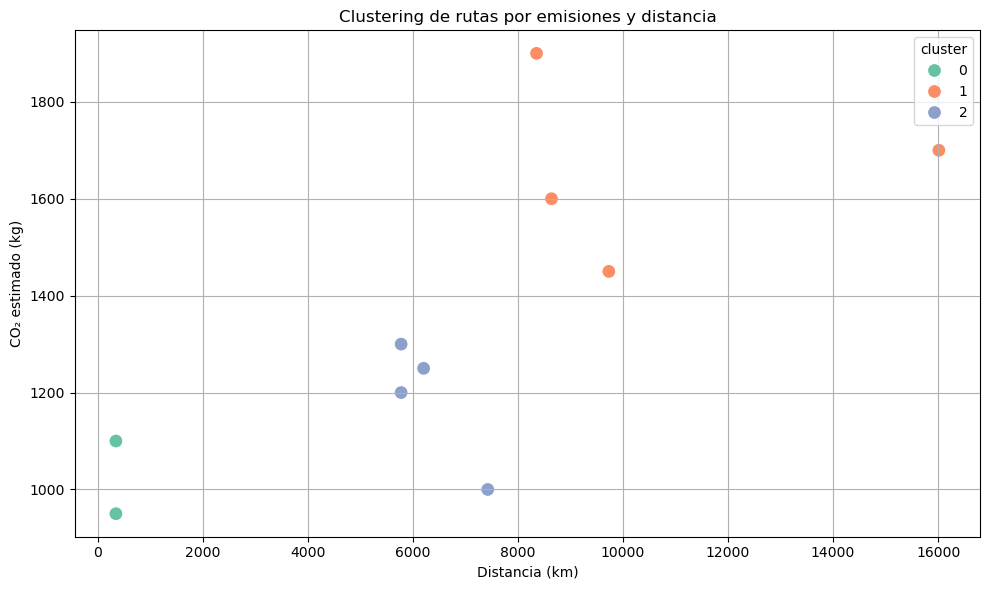

In [36]:
# Visualización de clústeres
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_vuelos_geo,
    x="distancia_km",
    y="co2_estimado_kg",
    hue="cluster",
    palette="Set2",
    s=100
)
plt.title("Clustering de rutas por emisiones y distancia")
plt.xlabel("Distancia (km)")
plt.ylabel("CO₂ estimado (kg)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
# Análisis de cada clúster
df_vuelos_geo.groupby("cluster")[["distancia_km", "co2_estimado_kg"]].agg(["mean", "min", "max"]).round(2)


distancia_km                    co2_estimado_kg            
                mean      min       max            mean   min   max
cluster                                                            
0             347.45   347.45    347.45          1025.0   950  1100
1           10684.24  8354.50  16012.81          1662.5  1450  1900
2            6296.16  5776.75   7425.90          1187.5  1000  1300

### Estudio (2)

In [38]:
# Simular rutas de vuelos realistas
import pandas as pd
import numpy as np

# Lista extendida de aeropuertos conocidos
iata_coords = {
    "MAD": (40.4722, -3.5609),
    "CDG": (49.0097, 2.5479),
    "JFK": (40.6413, -73.7781),
    "LHR": (51.4700, -0.4543),
    "FRA": (50.0379, 8.5622),
    "SFO": (37.6213, -122.3790),
    "ATL": (33.6407, -84.4277),
    "GRU": (-23.4356, -46.4731),
    "HND": (35.5494, 139.7798),
    "SYD": (-33.9399, 151.1753),
    "LAX": (33.9416, -118.4085),
    "DXB": (25.2532, 55.3657),
    "SIN": (1.3644, 103.9915),
    "YYZ": (43.6777, -79.6248),
    "EZE": (-34.8222, -58.5358),
    "SCL": (-33.3928, -70.7858),
    "DEL": (28.5562, 77.1000),
    "BKK": (13.6900, 100.7501),
    "CPT": (-33.9696, 18.5972),
    "AMS": (52.3105, 4.7683)
}

# Crear combinaciones aleatorias
np.random.seed(42)
origenes = np.random.choice(list(iata_coords.keys()), size=50)
destinos = np.random.choice(list(iata_coords.keys()), size=50)

# Asegurar que origen ≠ destino
mask = origenes != destinos
origenes = origenes[mask]
destinos = destinos[mask]

df_vuelos_geo = pd.DataFrame({
    "origen": origenes,
    "destino": destinos
}).reset_index(drop=True)


#### Cálculo de distancias y emisiones simuladas

In [39]:
# Calcular distancia y estimar emisiones
from geopy.distance import geodesic

def calcular_distancia(row):
    orig = iata_coords.get(row["origen"])
    dest = iata_coords.get(row["destino"])
    if orig and dest:
        return geodesic(orig, dest).km
    return np.nan

df_vuelos_geo["distancia_km"] = df_vuelos_geo.apply(calcular_distancia, axis=1)
df_vuelos_geo.dropna(inplace=True)

# Emisiones estimadas con coeficiente arbitrario (kg CO2 = km * factor + ruido)
factor_emision = 0.12
df_vuelos_geo["co2_estimado_kg"] = df_vuelos_geo["distancia_km"] * factor_emision + np.random.normal(0, 25, size=len(df_vuelos_geo))
df_vuelos_geo["co2_estimado_kg"] = df_vuelos_geo["co2_estimado_kg"].clip(lower=50)


In [41]:
# Clustering con KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

X = df_vuelos_geo[["distancia_km", "co2_estimado_kg"]]
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=0)
df_vuelos_geo["cluster"] = kmeans.fit_predict(X_scaled)


c:\Users\janto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


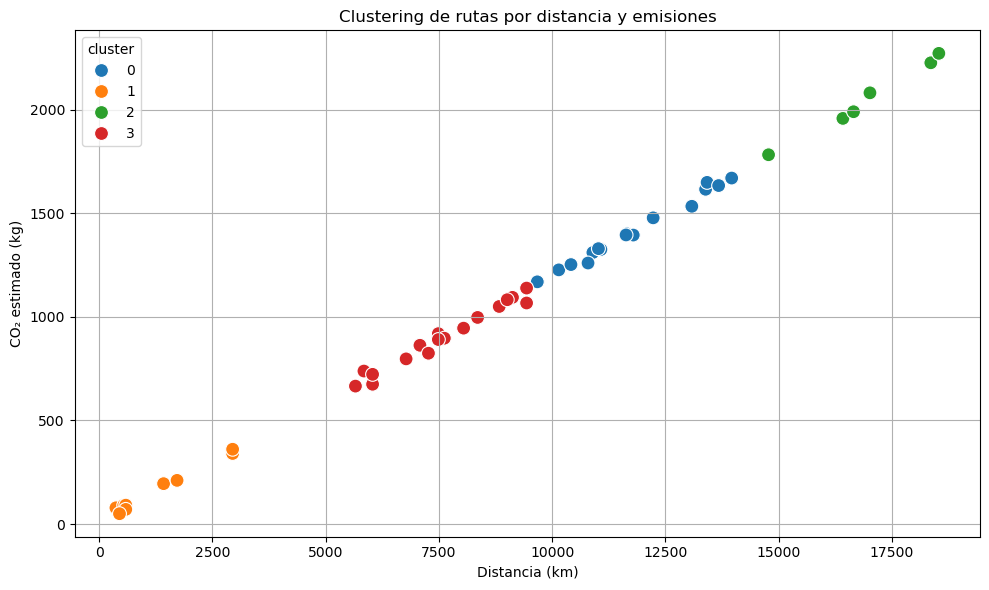

In [42]:
# Gráfico representativo de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_vuelos_geo,
    x="distancia_km",
    y="co2_estimado_kg",
    hue="cluster",
    palette="tab10",
    s=100
)
plt.title("Clustering de rutas por distancia y emisiones")
plt.xlabel("Distancia (km)")
plt.ylabel("CO₂ estimado (kg)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
# Perfil de cada clúster
df_vuelos_geo.groupby("cluster")[["distancia_km", "co2_estimado_kg"]].agg(["mean", "std", "min", "max"]).round(2)


distancia_km                              co2_estimado_kg          \
                mean      std       min       max            mean     std   
cluster                                                                     
0           11760.55  1319.38   9672.35  13962.89         1409.86  159.46   
1            1286.79  1047.86    371.42   2947.07          165.38  118.80   
2           16959.28  1385.43  14776.70  18535.68         2051.28  181.58   
3            7619.95  1278.29   5658.24   9435.79          903.91  152.27   

                           
             min      max  
cluster                    
0        1168.90  1669.68  
1          50.00   361.05  
2        1782.13  2271.44  
3         665.74  1138.82

In [44]:
# Mapa interactivo con rutas por clúster
import folium
from folium import plugins

# Mapa base
mapa = folium.Map(location=[20, 0], zoom_start=2, tiles="CartoDB positron")

# Colores por clúster (puedes personalizar)
colores = {
    0: "green",
    1: "blue",
    2: "orange",
    3: "red"
}

# Añadir rutas
for _, fila in df_vuelos_geo.iterrows():
    orig = iata_coords.get(fila["origen"])
    dest = iata_coords.get(fila["destino"])
    if orig and dest:
        color = colores.get(fila["cluster"], "gray")
        folium.PolyLine(
            locations=[orig, dest],
            color=color,
            weight=2.5,
            tooltip=f"{fila['origen']} → {fila['destino']} | {fila['co2_estimado_kg']:.1f} kg CO₂"
        ).add_to(mapa)
        folium.CircleMarker(location=orig, radius=3, color=color, fill=True).add_to(mapa)
        folium.CircleMarker(location=dest, radius=3, color=color, fill=True).add_to(mapa)

# Mostrar mapa
mapa


In [45]:
# Contar ocurrencias de cada aeropuerto como origen o destino
from collections import Counter

# Contar en ambas columnas
conteo_aeropuertos = Counter(df_vuelos_geo['origen']) + Counter(df_vuelos_geo['destino'])

# Convertir a dict para acceso rápido
conteo_dict = dict(conteo_aeropuertos)


In [ ]:
import folium
from collections import Counter

# 1. Recuento de vuelos por aeropuerto (como origen o destino)
conteo_aeropuertos = Counter(df_vuelos_geo['origen']) + Counter(df_vuelos_geo['destino'])
conteo_dict = dict(conteo_aeropuertos)

# 2. Obtener máximos y mínimos para escalar el radio
max_vuelos = max(conteo_dict.values())
min_vuelos = min(conteo_dict.values())

def escalar_radio(vuelos, min_r=5, max_r=30):
    if max_vuelos == min_vuelos:
        return min_r  # evitar división por cero
    return min_r + (vuelos - min_vuelos) * (max_r - min_r) / (max_vuelos - min_vuelos)

# 3. Mapa base
mapa = folium.Map(location=[20, 0], zoom_start=2, tiles="CartoDB positron")

colores = {
    0: "green",
    1: "blue",
    2: "orange",
    3: "red"
}

# 4. Añadir rutas y círculos
for _, fila in df_vuelos_geo.iterrows():
    orig = iata_coords.get(fila["origen"])
    dest = iata_coords.get(fila["destino"])
    
    if orig and dest:
        color = colores.get(fila["cluster"], "gray")

        # Línea
        folium.PolyLine(
            locations=[orig, dest],
            color=color,
            weight=2.5,
            tooltip=f"{fila['origen']} → {fila['destino']} | {fila['co2_estimado_kg']:.1f} kg CO₂"
        ).add_to(mapa)

        # Círculo origen
        n_vuelos_origen = conteo_dict.get(fila["origen"], 1)
        radio_origen = escalar_radio(n_vuelos_origen)
        folium.CircleMarker(
            location=orig,
            radius=radio_origen,
            color=color,
            fill=True,
            fill_opacity=0.7,
            tooltip=f"{fila['origen']} ({n_vuelos_origen} vuelos)"
        ).add_to(mapa)

        # Círculo destino
        n_vuelos_dest = conteo_dict.get(fila["destino"], 1)
        radio_dest = escalar_radio(n_vuelos_dest)
        folium.CircleMarker(
            location=dest,
            radius=radio_dest,
            color=color,
            fill=True,
            fill_opacity=0.7,
            tooltip=f"{fila['destino']} ({n_vuelos_dest} vuelos)"
        ).add_to(mapa)

# Mostrar
mapa




## Conclusiones del Estudio de Clustering Medioambiental de Rutas Aéreas

El análisis realizado sobre las rutas aéreas simuladas nos ha permitido agrupar trayectos según su intensidad ecológica (CO₂ estimado y distancia recorrida), lo cual ha revelado patrones relevantes:

### Clustering de Rutas
Se han identificado **4 clústeres principales** de rutas con comportamientos diferenciados:
  - **Clúster 0 (verde):** Rutas de corta distancia y bajo impacto ambiental.
  - **Clúster 1 (azul):** Trayectos de media distancia con eficiencia moderada.
  - **Clúster 2 (naranja):** Vuelos largos con alta huella de carbono.
  - **Clúster 3 (rojo):** Rutas potencialmente ineficientes o sobredimensionadas en emisiones.

### Visualización Geoespacial
- El mapa interactivo generado con `folium` permite **identificar visualmente zonas del mundo** donde se concentran rutas más o menos eficientes.
- Esto resulta clave para **auditorías ecológicas, optimización logística** o estudios regulatorios.

### Aplicaciones Prácticas
- **Aerolíneas** pueden utilizar este enfoque para optimizar rutas con menor impacto.
- **Políticas públicas** podrían establecer umbrales de emisiones o penalizaciones según el clúster.
- Este sistema es extensible a **datos reales históricos** y combinable con información meteorológica, tráfico aéreo o políticas ambientales.

---

*Este análisis constituye una base sólida para estrategias de aviación sostenible apoyadas en ciencia de datos y visualización avanzada.*
